# House Prediction


In [ ]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
import matplotlib 
import numpy as np
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)



In [5]:
print(" ")
print(" ")
print("STEP 1: LOAD DATA")
print(" ")
print(" ")

 
 
STEP 1: LOAD DATA
 
 


In [ ]:
df1 = pd.read_csv("/Users/nguyenthientoan/Desktop/Bengaluru_House_Data.csv")
df1.head()

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#Drop features that are not required to build our model

df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape
df2


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
print(" ")
print(" ")
print("STEP 2: DATA CLEANING")
print(" ")
print(" ")

 
 
STEP 2: DATA CLEANING
 
 


In [133]:
#STEP 2: DATA CLEANING 

In [9]:
df2.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [135]:
df2.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [136]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#drop NA value
df3 = df2.dropna()
df3.shape

(13246, 5)

In [138]:
print(" ")
print(" ")
print("STEP 3: FEATURE ENGINEERING")
print(" ")
print(" ")

 
 
STEP 3: FEATURE ENGINEERING
 
 


In [11]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [19]:
#Add new feature(integer) for bhk (Bedrooms Hall Kitchen)
df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))
df3

<ipython-input-19-d374f3f093c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split()[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [37]:
#Explore total_sqft feature
df3.isnull().any()


location      False
size          False
total_sqft    False
bath          False
price         False
bhk           False
dtype: bool

In [13]:
df3[~df3['total_sqft'].apply(float)]
# there are some values which are not converted to float form

ValueError: could not convert string to float: '2100 - 2850'

In [14]:
print("")
print("Because there are errors in data type, the code could not run")
print("")


Because there are errors in data type, the code could not run



In [20]:
#Create new function, if the operations is true, it give a correct result. Otherwise, it gives values which make the operation be false
def is_float(x):
 try:
        float(x)
 except: 
        return False
 return True

In [21]:

df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
print("Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple")

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple


In [22]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [24]:
df4[~df4['total_sqft'].apply(is_float)]
# now, the data type is converted to float

,location,size,total_sqft,bath,price,bhk


In [ ]:
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

In [ ]:
df3.loc[30]

In [ ]:
df4.loc[30]

In [13]:
print("there is a difference in total_sqft field ")
print(" ")
print(" ")

there is a difference in total_sqft field 
 
 


In [25]:
#Add new feature called price per square feet
df5 = df4.copy()
df5['price_per_sqft']=df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [47]:
#check statistics of columns 
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
df5.to_csv("bhp.csv",index=False)

In [ ]:
df5.head()

In [26]:
# Remove spaces at the beginning and at the end of the string
df5.location = df5.location.apply(lambda x: x.strip())


In [27]:
df5['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [28]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield            535
Sarjapur  Road        392
Electronic City       304
Kanakpura Road        266
Thanisandra           236
                     ... 
Sundara Nagar           1
singapura paradise      1
Veerabhadra Nagar       1
KPC Layout              1
Chokkasandra            1
Name: location, Length: 1293, dtype: int64

In [ ]:
location_stats.values.sum

In [ ]:
len(location_stats)

In [ ]:
print("There are 1287 different locations but there exists some locations which the amount of its appearance is low. Consider equal or less than 10 is low")

In [29]:
len(location_stats[location_stats <= 10])

1052

In [30]:
len(location_stats[location_stats > 10])

241

In [ ]:
print(" ")
print(" ")
print("STEP 3.1: DIMENSIONALITY REDUCTION")
print(" ")
print(" ")

In [ ]:
print("")
print("Any location having less than 10 data points should be tagged as OTHER location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns")
print("")

In [31]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Kalkere                 10
Nagappa Reddy Layout    10
Basapura                10
BTM 1st Stage           10
Dodsworth Layout        10
                        ..
Sundara Nagar            1
singapura paradise       1
Veerabhadra Nagar        1
KPC Layout               1
Chokkasandra             1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df5.location.unique())

In [58]:
df5['location'].describe()

count          13246
unique          1293
top       Whitefield
freq             535
Name: location, dtype: object

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10  else x)
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [ ]:
df5.head(30)

In [ ]:
print(" ")
print(" ")
print("STEP 3.2: OUTLIER REMOVAL USING BUSINESS LOGIC")
print(" ")
print(" ")

In [ ]:
print("")
print("As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft")
print("")

In [ ]:
print("")
print("Consider bedroom is around 300 metter square per each ")
print("")
print("Consider price per sqft normally is higher when number of bedroom is higher ")
print("")
print("Consider price per sqft normally is higher when total price is higher ")
print("")

In [33]:
df5[df5['total_sqft']/df5['bhk'] < 300 ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
print("")
print("Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely")
print("")

In [148]:
df5.shape

(13200, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [ ]:
print(" ")
print(" ")
print("STEP 3.3: OUTLIER REMOVAL USING STANDARD DEVIATION AND MEAN")
print(" ")
print(" ")

In [145]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
print("")
print("Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation")
print("")

In [35]:
def remove_pps_outliers(df):
     df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [63]:
df7.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

In [ ]:
print("")
print("Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like")
print("")

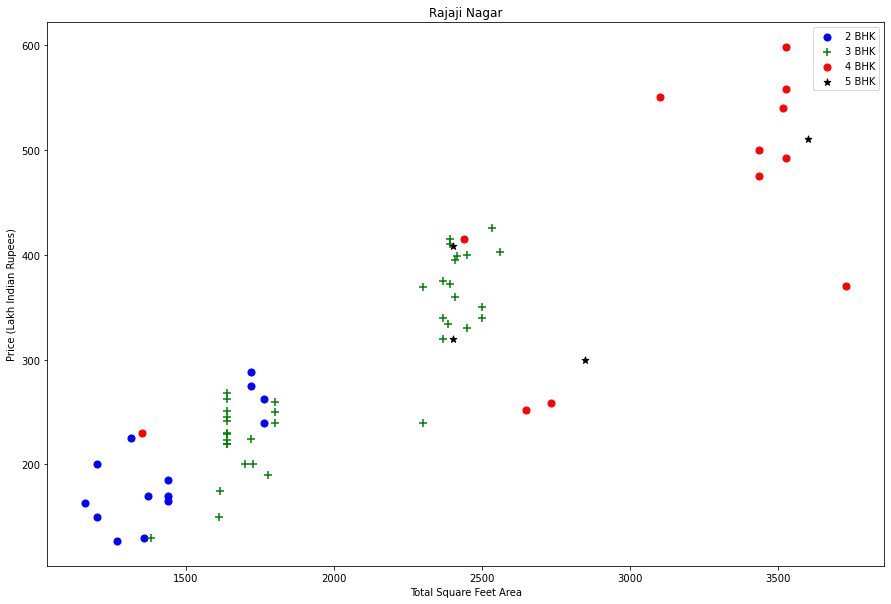

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    bhk4 = df[(df.location==location) & (df.bhk==4)]
    bhk5 = df[(df.location==location) & (df.bhk==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,color='red',label='4 BHK', s=50)
    plt.scatter(bhk5.total_sqft,bhk5.price,marker='*', color='black',label='5 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

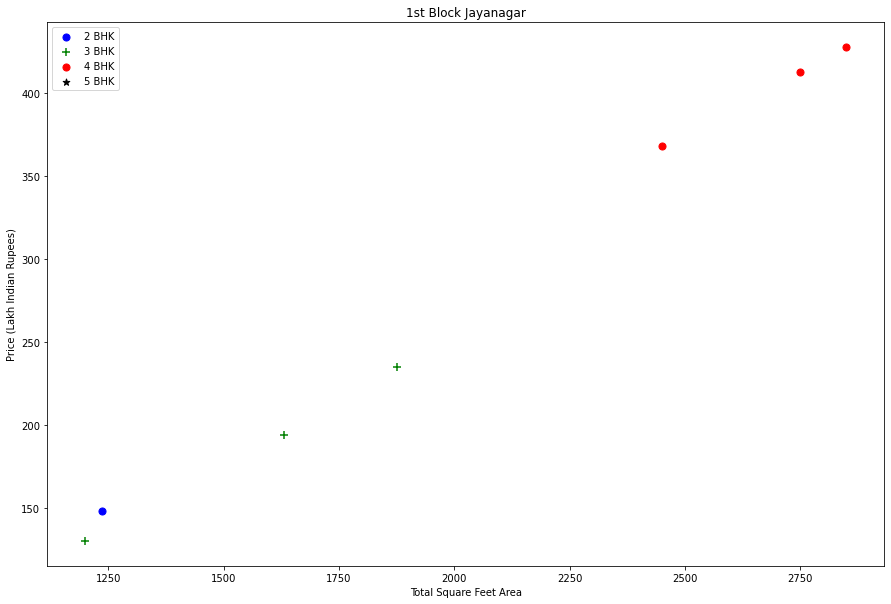

In [154]:
plot_scatter_chart(df7,"1st Block Jayanagar")

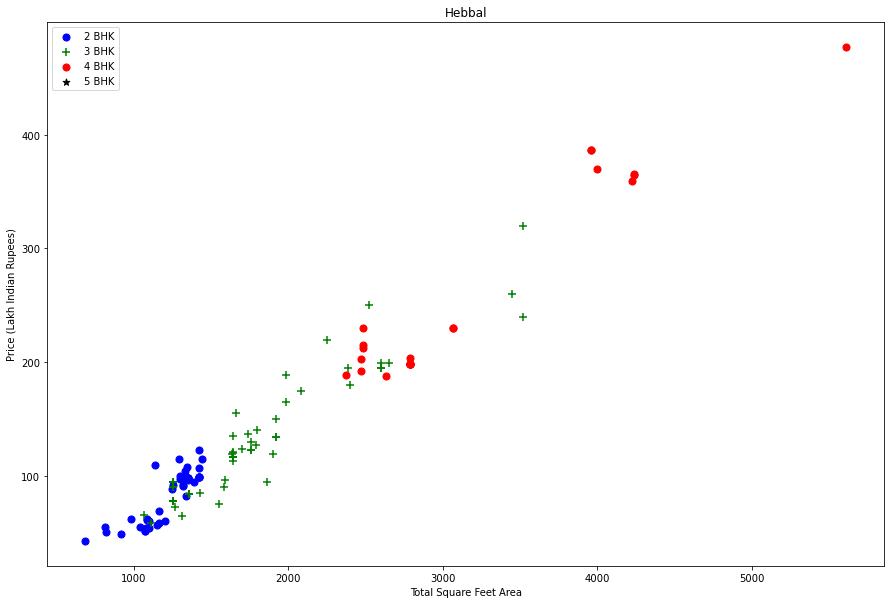

In [155]:
plot_scatter_chart(df7,"Hebbal")

In [37]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

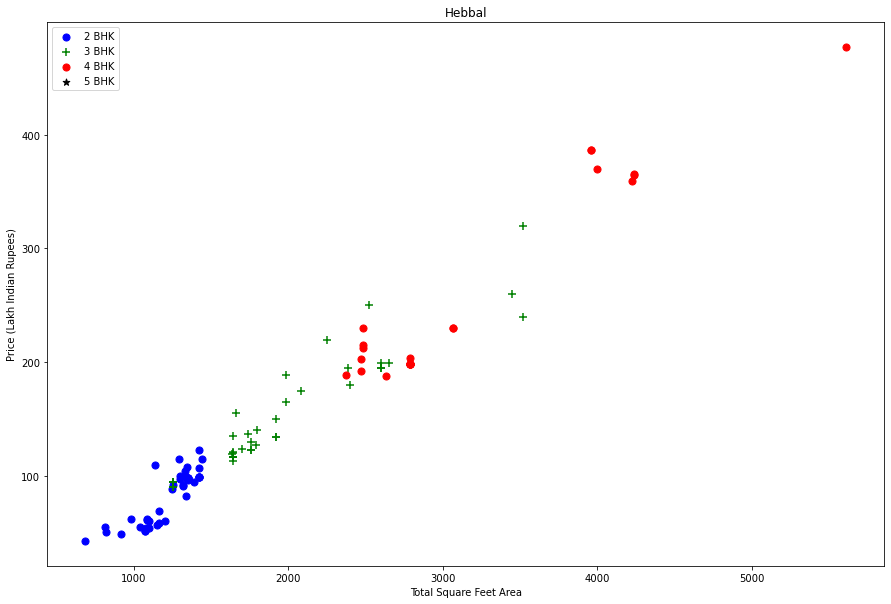

In [158]:
plot_scatter_chart(df8,"Hebbal")


Text(0, 0.5, 'Count')

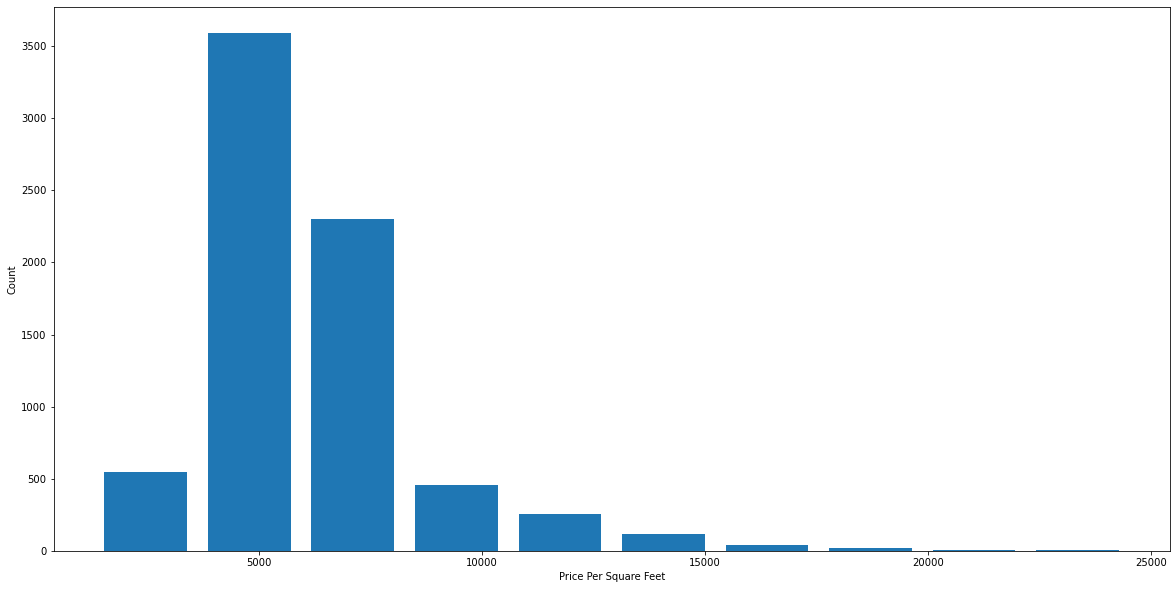

In [38]:

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [231]:
print("")
print("STEP 3.4: OUTLIER REMOVAL USING BATHROOMS FEATURE")
print("")


STEP 3.4: OUTLIER REMOVAL USING BATHROOMS FEATURE



Text(0, 0.5, 'Count')

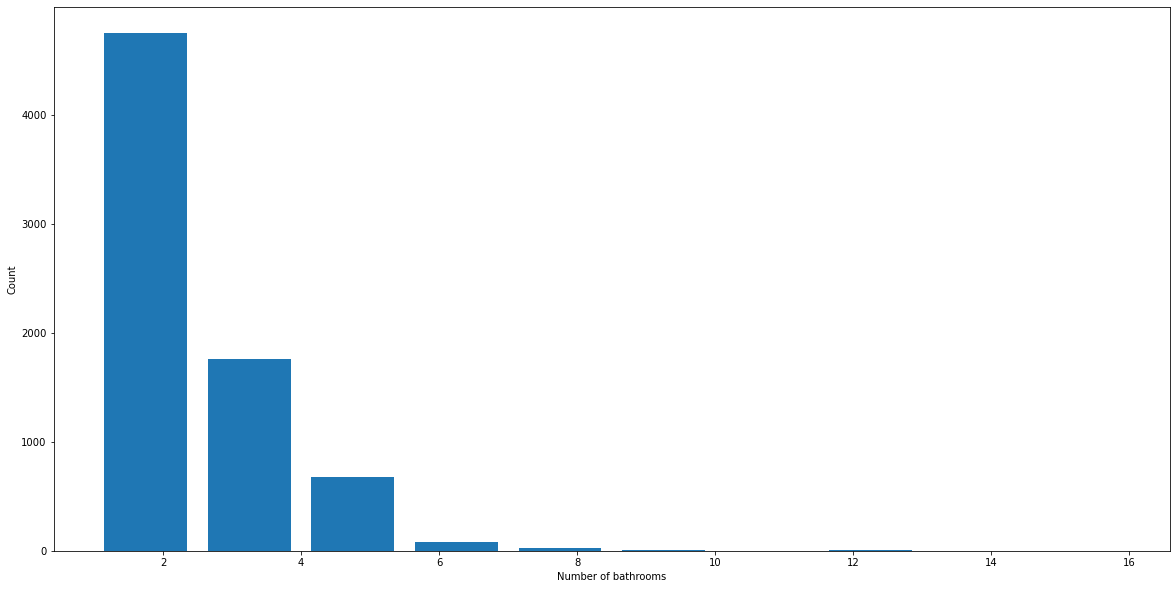

In [199]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [67]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [209]:
print("")
print("It is unsual to have 2 more bathrooms than number of bedrooms in a home")
print("")


It is unsual to have 2 more bathrooms than number of bedrooms in a home



In [215]:
print("")
print("Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed")
print("")


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed



In [39]:
df9=df8[df8.bath<df8.bhk + 2]
df9.shape

(7251, 7)

In [86]:
df9.to_csv(r'\Users\nguyenthientoan\Desktop\houseData.csv',index=False)

In [ ]:
df5.to_csv("bhp.csv",index=False)

In [42]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [232]:
print("")
print("STEP 3.5: USE ONE HOT ENCODING FOR LOCATION")
print("")


STEP 3.5: USE ONE HOT ENCODING FOR LOCATION



In [43]:
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df12 = df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
print("")
print("STEP 4: BUILD A MODEL NOW,....")
print("")


STEP 4: BUILD A MODEL NOW,....



In [234]:
df12.shape

(7239, 244)

In [46]:
X= df12.drop(['price'],axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [238]:
len(y)

7239

In [240]:
print("")
print("Using SKLEARN to split data set into train and test in a academic and automatic way. Take 80% of data for train, 20% for test")
print("")


Using SKLEARN to split data set into train and test in a academic and automatic way. Take 80% of data for train, 20% for test



In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [51]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [52]:
lr_clf.score(X_test,y_test)

0.845227769787428

In [53]:
print("")
print("STEP 5: USE A K FOLD CROSS VALIDATION TO MEASURE ACCUARACY OF OUR LINEAREGRESSION MODEL")
print("")


STEP 5: USE A K FOLD CROSS VALIDATION TO MEASURE ACCUARACY OF OUR LINEAREGRESSION MODEL



In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313,
       0.85652266, 0.86143616, 0.80699475, 0.82931523, 0.8685056 ,
       0.88389274, 0.84847064, 0.88798648, 0.85372111, 0.85997565])

In [253]:
print("")
print("We can see that in 20 iterations we get a score totally above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose")
print("")


We can see that in 20 iterations we get a score totally above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose



In [254]:
print("")
print("STEP 6: FIND BEST MODEL USING GridSearchCV")
print("")


STEP 6: FIND BEST MODEL USING GridSearchCV



In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687445,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.729302,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [256]:
print("")
print("Based on above results we can say that LinearRegression gives the best score. Hence we will use that.")
print("")


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.



In [ ]:
print("")
print("PART 7: TEST MODEL FOR FEW PROPERTIES")
print("")

In [56]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [57]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677167736

In [265]:
    predict_price('1st Phase JP Nagar',2121, 1, 3)

168.45889892705452

In [1]:
print("")
print("NOW, I HAVE A COMPLETE MODEL TO FORECAST BASE ON 4 FACTORS: LOCATION, TOTAL_SQFT,BATHROOM,BEDROOM")
print("")


NOW, I HAVE A COMPLETE MODEL TO FORECAST BASE ON 4 FACTORS: LOCATION, TOTAL_SQFT,BATHROOM,BEDROOM

